# spanish texts

## text corpus

In [94]:
import pandas as pd 

In [95]:
import pandas as pd
corpus = pd.read_csv('corpus.txt', delimiter = "\t", header=None)
corpus.columns = ['texts']

In [96]:
corpus = list(corpus['texts'])

In [97]:
corpus[:15]

['El curso está en general bien constituido ',
 'Lo mejor de él es el cuerpo docente con el cual se establece una abierta',
 'El orden de los contenido',
 'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
 'Que se mantenga la dinamica de separar por dias las prueba teorica de la práctica',
 'Que se agregue una mesa mas en los practicos a fin ',
 'disminuir el numero de alumnos por mesas ',
 '6 a 8 alumnos por mesa permitiendo un aprendizaje mas personalizado',
 'Deberian haber mas practicos ',
 'Me gustaria que se hicieran mas ayudantías antes de las pruebas ',
 'que los practicos sean mas clase, en vez de dejarnos solos a identificar estructuras.',
 'Que las solemnes sigan siendo separadas ',
 'sigan con los seminarios hechos desde la casa',
 'que se aconseje un libro para el estudio de una determinada materia',
 'capítulos a leer para obtener la información desde una fuente que le aporte para el aprendizaje.']

In [98]:
def tokenize(s):
    return s.split(' ')

In [99]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
!pip install -U pip setuptools wheel

In [101]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [102]:
!python -m spacy download es_dep_news_trf

     |████████████████████████████████| 410.0 MB 9.2 kB/s eta 0:00:012
✔ Download and installation successful
You can now load the package via spacy.load('es_dep_news_trf')


In [103]:
import spacy
nlp = spacy.load('es_dep_news_trf')

In [104]:
from nltk.corpus import stopwords

def clean(sentence):
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    doc = nlp(sentence)
    sentence = [token.lemma_ for token in doc if token.pos_=='NOUN']
    sentence=list(filter(None, [w.lower().translate(table) for w in sentence]))
    sentence = [w for w in sentence if w not in stopwords.words('spanish')]
    #language=[[w for w in s if w!="''"] for s in language] 
    #language=[[w for w in s if w!='̃'] for s in language] 
    sentence=[w for w in sentence if not w.isdigit()]
    return sentence

In [105]:
clean('El curso está,, en general; bien constituido ')

['curso', 'general']

## basic statistics: types and tokens

In [106]:
#clean_corpus_all = [clean(sentence) for sentence in corpus]
#index_sentences = dict(zip(range(len(clean_corpus_all),clean_corpus_all)))
clean_corpus = []
CORPUS = []
for i in range(len(corpus)):
    C = clean(corpus[i])
    if len(C)>1:
        clean_corpus+=[C]
        CORPUS+=[corpus[i]]

In [107]:
clean_corpus[:5]

[['curso', 'general'],
 ['orden', 'contenido'],
 ['acuerdo', 'contenido', 'clase', 'bibliografía'],
 ['dinamica', 'dia', 'prueba', 'práctica'],
 ['mesa', 'practico', 'fin']]

In [108]:
from collections import Counter

In [109]:
words =[item for sublist in clean_corpus for item in sublist]
number_tokens = len(words)
number_types = len(set(words))
print(number_tokens,number_types)

858 291


## graphs!

In [110]:
import networkx as nx

In [111]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW(radius=4):
    G=nx.Graph()
    for sentence in clean_corpus:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)      
    return G.subgraph(Gcc[0]).copy()

In [112]:
graph_text = GoW()

In [113]:
graph_text.nodes()

NodeView(('curso', 'general', 'orden', 'contenido', 'acuerdo', 'clase', 'bibliografía', 'dinamica', 'dia', 'prueba', 'práctica', 'mesa', 'practico', 'fin', 'numero', 'alumno', 'aprendizaje', 'ayudantía', 'vez', 'estructura', 'seminario', 'casa', 'libro', 'estudio', 'materia', 'capítulo', 'información', 'fuente', 'profesor', 'cuanto', 'limit', 'ayuda', 'practica', 'teorica', 'pelvi', 'día', 'bloque', 'atención', 'hilo', 'caso', 'instancia', 'forma', 'ayudantia', 'horario', 'yincana', 'imagenología', 'imagenologia', 'sala', 'semestre', 'distribución', 'torax', 'cuello', 'continuacion', 'relación', 'inervación', 'irrigación', 'desempeño', 'estudiante', 'disposición', 'ambiente', 'alumnado', 'guía', 'autorregulación', 'actividad', 'posibilidad', 'nota', 'control', 'revisión', 'ayudante', 'presencia', 'opción', 'video', 'operación', 'disección', 'cadaver', 'organizacion', 'patología', 'paciente', 'pregunta', 'punto', 'porcion', 'tuba', 'cámara', 'práctico', 'puesto', 'trabajo', 'dibujo', 'm

In [114]:
import matplotlib.pyplot as plt

def plot_graph(G):
    fig, ax = plt.subplots(dpi=800)
    pos = nx.kamada_kawai_layout(G)
    labels={i:i for i in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size = 10, node_color='orange') 
    nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='lime')
    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=3,font_color='k')
    plt.axis('off')
    plt.show()

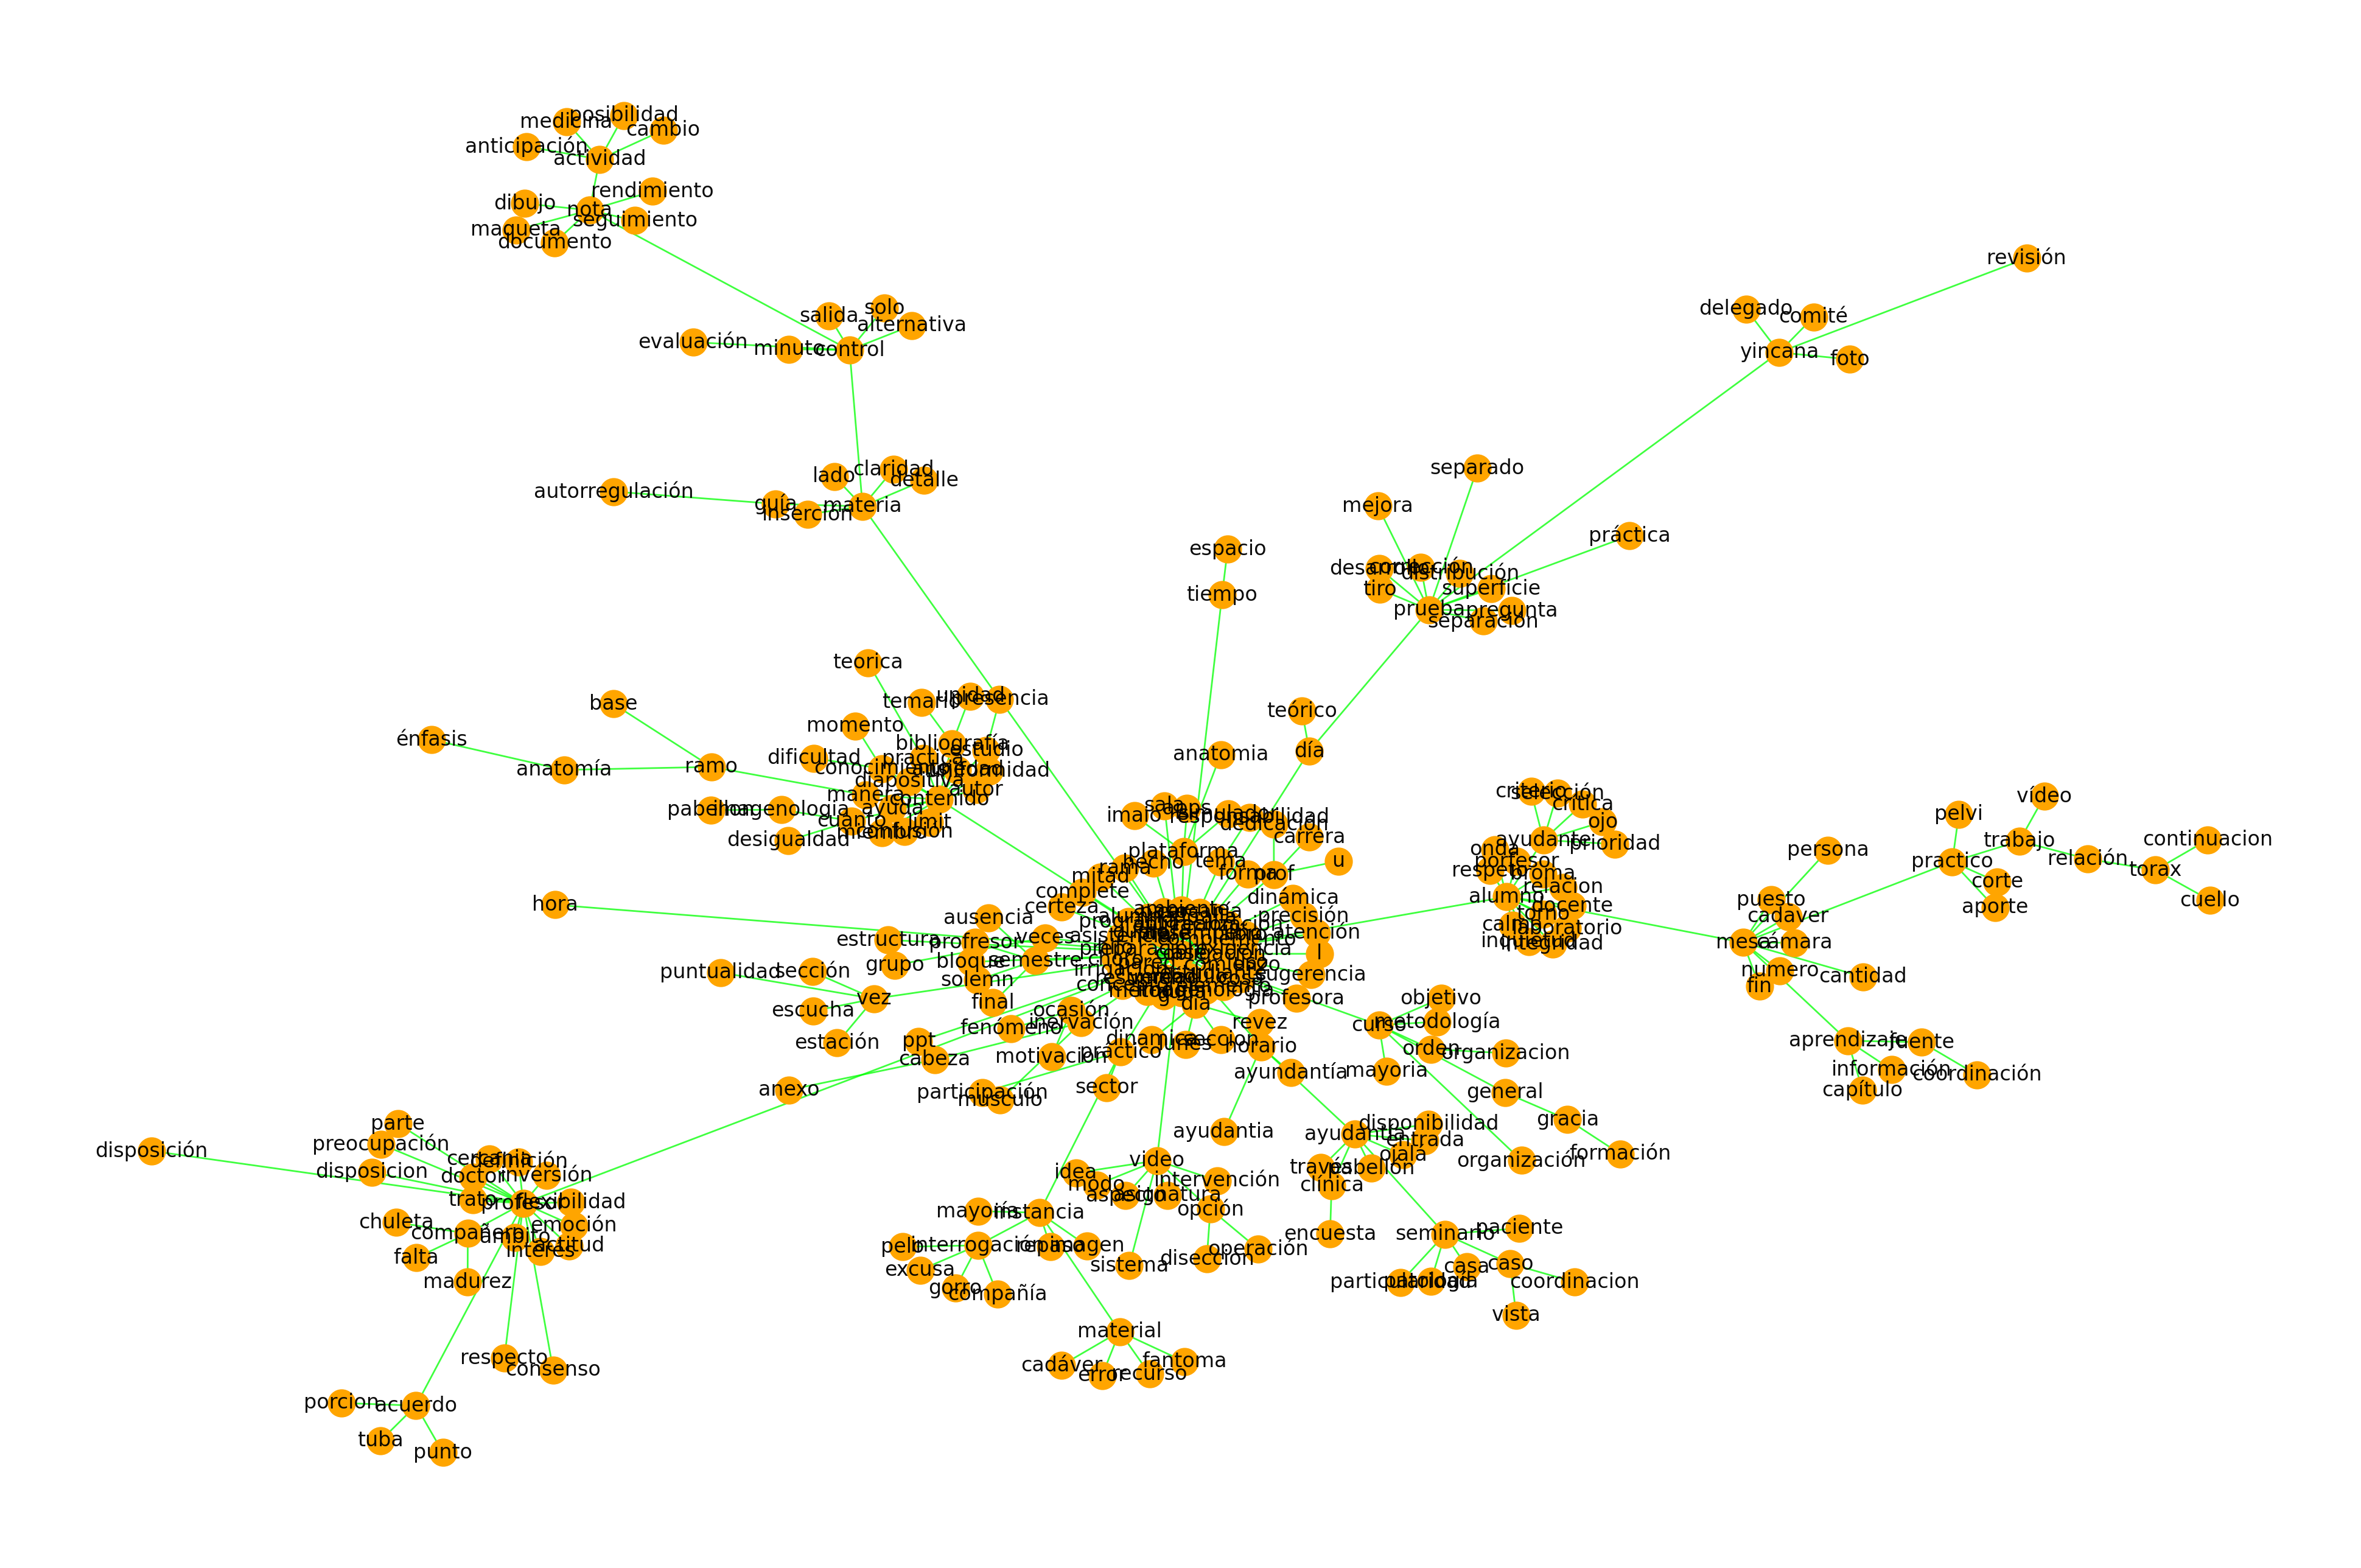

In [115]:
plot_graph(nx.maximum_spanning_tree(graph_text))

### main core

In [116]:
graph_text.remove_edges_from(nx.selfloop_edges(graph_text))
core_numbers = dict(nx.core_number(graph_text))
main_core = nx.k_core(graph_text)

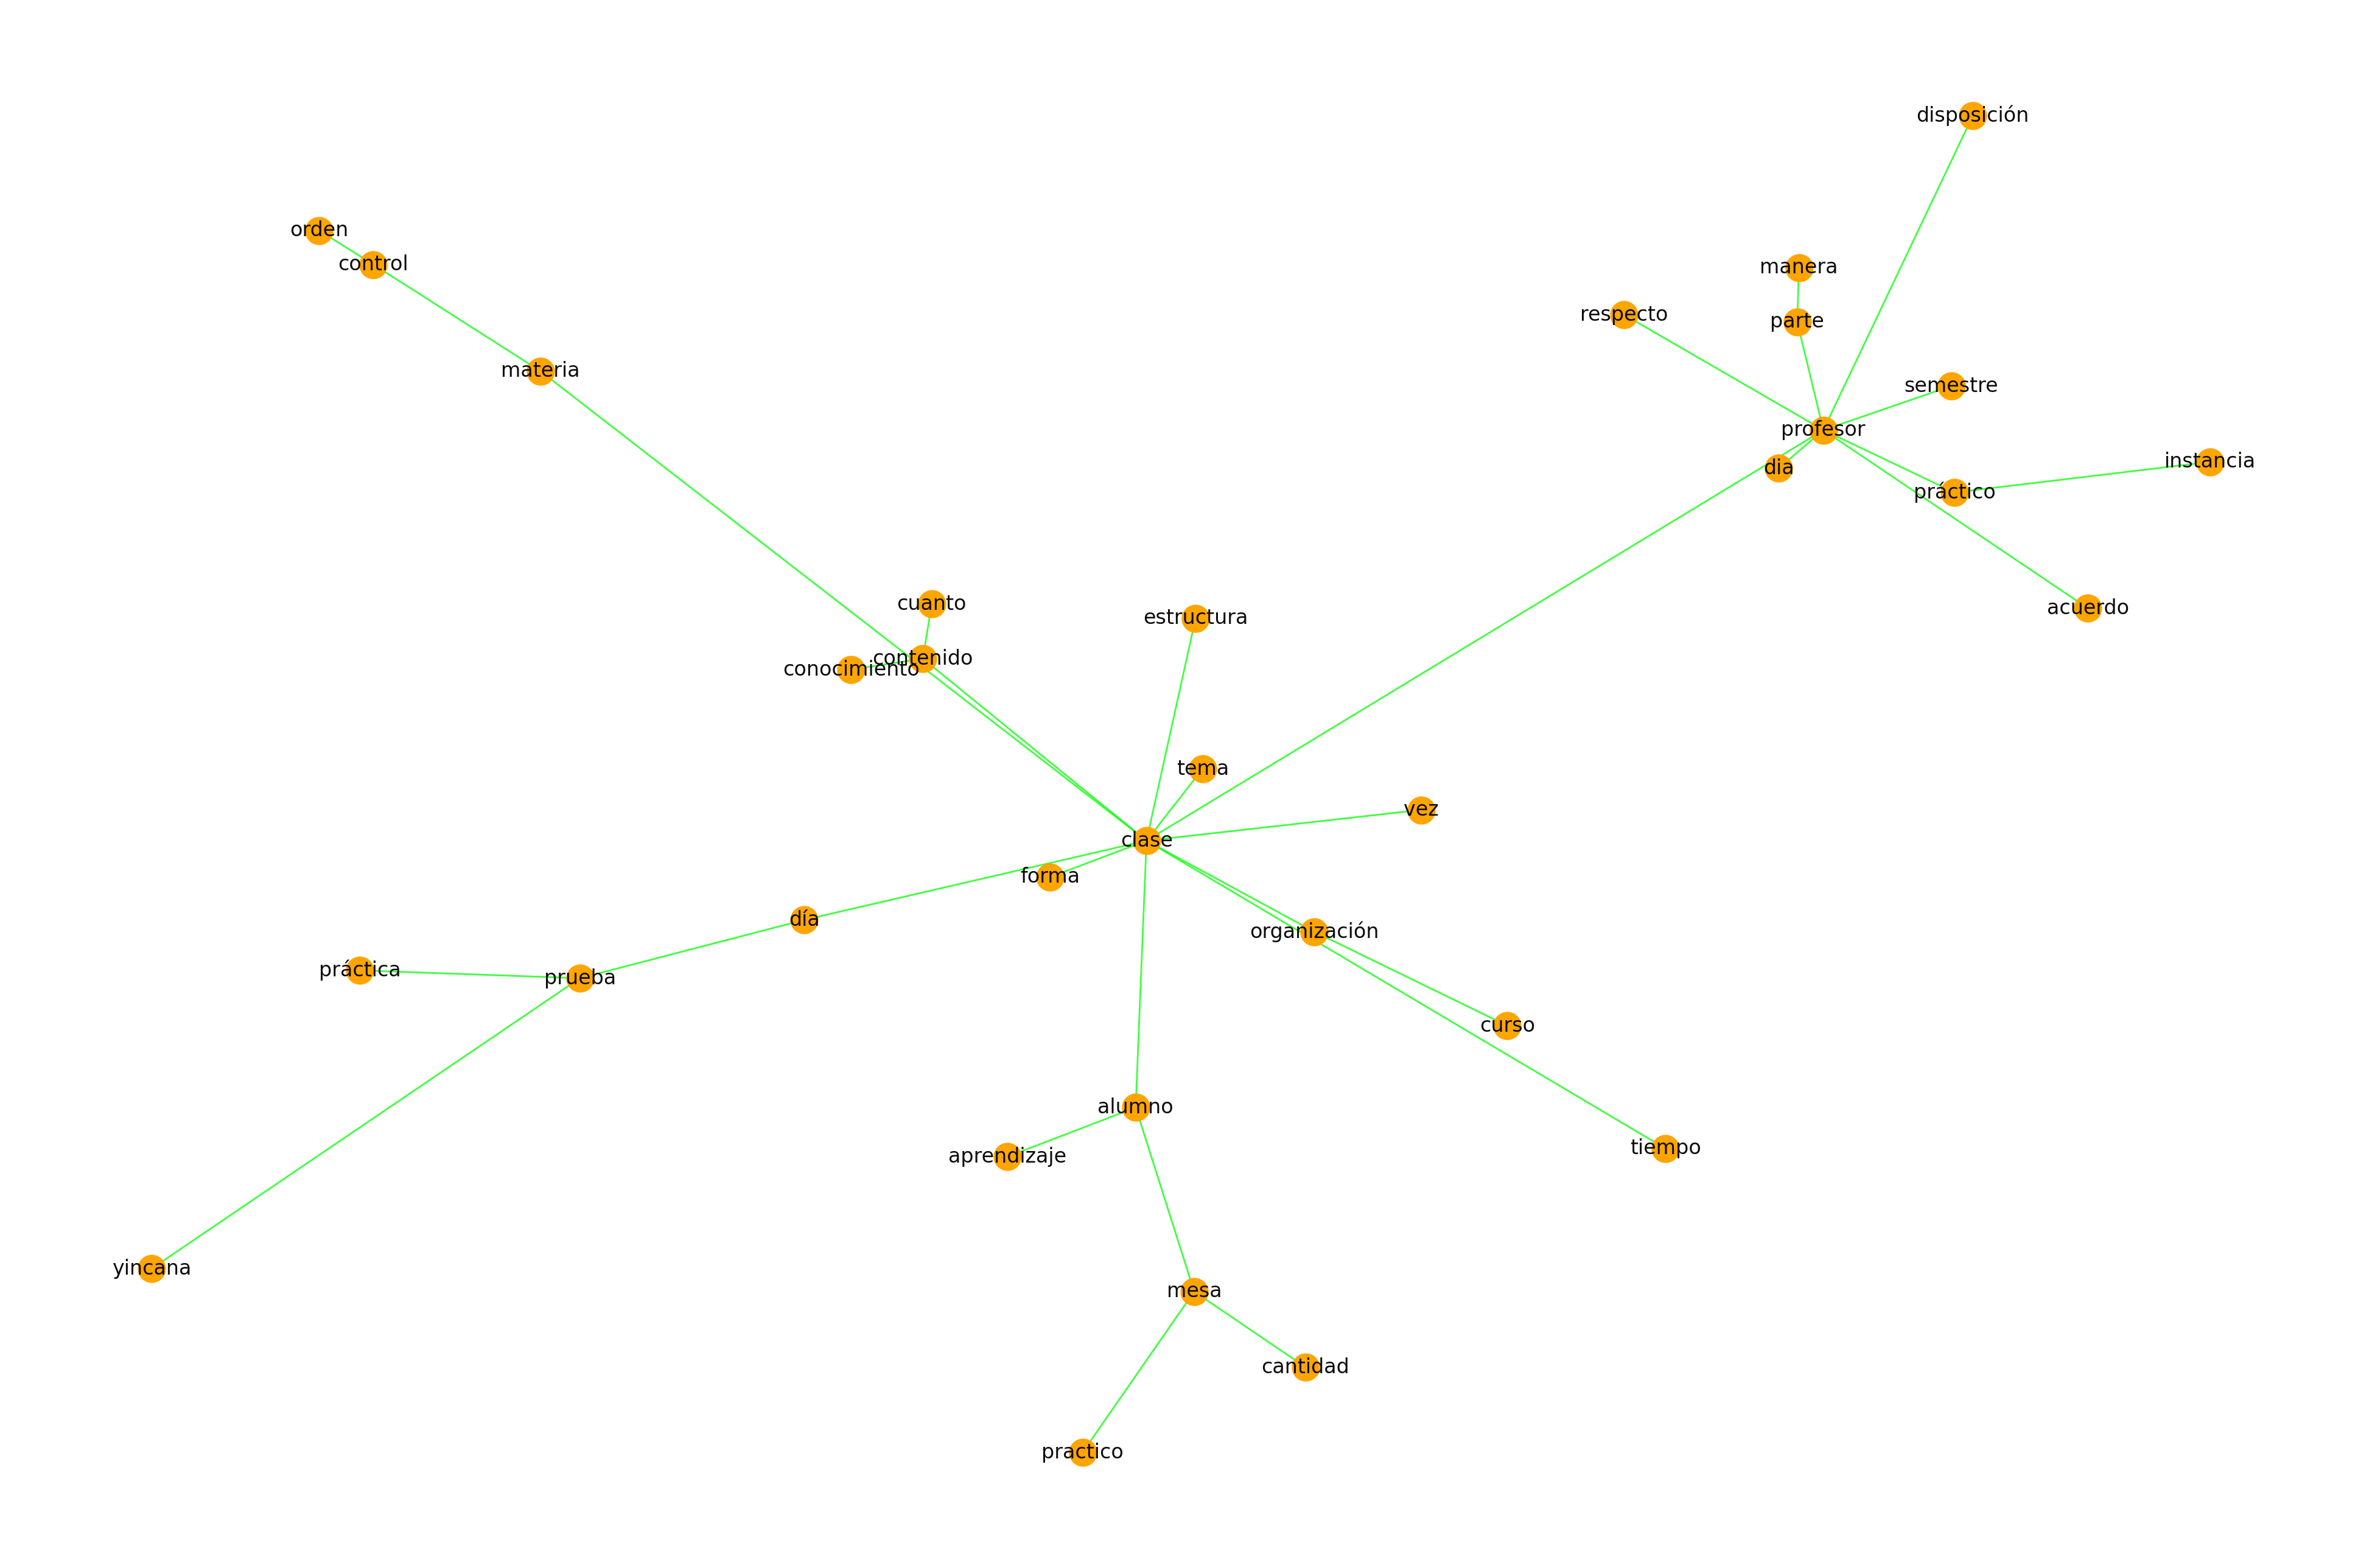

In [117]:
plot_graph(nx.maximum_spanning_tree(main_core))

## community structure

In [118]:
!pip install python-louvain

In [119]:
import community as community_louvain

In [120]:
partition = community_louvain.best_partition(main_core,resolution=1)

In [121]:
len(set(partition.values()))

4

In [122]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(partition.items()):
    v[value].append(key)

In [123]:
partition = dict(v)

In [124]:
partition

{0: ['acuerdo',
  'clase',
  'conocimiento',
  'contenido',
  'cuanto',
  'curso',
  'estructura',
  'forma',
  'manera',
  'materia',
  'organización',
  'tiempo'],
 3: ['alumno', 'aprendizaje', 'cantidad', 'mesa', 'practico', 'vez'],
 2: ['control',
  'dia',
  'día',
  'instancia',
  'orden',
  'prueba',
  'práctica',
  'práctico',
  'yincana'],
 1: ['disposición', 'parte', 'profesor', 'respecto', 'semestre', 'tema']}

In [125]:
def sum_cores(core_numbers,node,G):
    N = list(dict(G[node]).keys())
    C = 0
    for nodenode in N:
        C+=core_numbers[nodenode]
    return C

In [126]:
partition_core = {key:{word:sum_cores(core_numbers,word,graph_text) for word in partition[key]} for key in partition.keys()}

In [127]:
partition_core = {key:dict(sorted(partition_core[key].items(), key=lambda item: item[1],reverse=True)) for key in partition_core.keys()}

In [128]:
partition_core

{0: {'clase': 376,
  'materia': 199,
  'contenido': 125,
  'tiempo': 79,
  'acuerdo': 67,
  'manera': 62,
  'forma': 60,
  'conocimiento': 52,
  'cuanto': 49,
  'curso': 47,
  'estructura': 46,
  'organización': 44},
 3: {'alumno': 149,
  'practico': 100,
  'vez': 82,
  'mesa': 69,
  'cantidad': 68,
  'aprendizaje': 65},
 2: {'práctico': 140,
  'instancia': 126,
  'control': 121,
  'prueba': 112,
  'yincana': 96,
  'día': 66,
  'dia': 58,
  'práctica': 49,
  'orden': 45},
 1: {'profesor': 246,
  'respecto': 123,
  'semestre': 84,
  'disposición': 65,
  'parte': 65,
  'tema': 50}}

## clustering!

In [129]:
cluster_sentences = {group:[] for group in partition.keys()}

In [130]:
## https://aclanthology.org/W04-3252.pdf

import numpy as np

def similarity(L1,L2):
    return len(list(set(L1) & set(L2)))/(np.log(len(L1))+np.log(len(L2)))

In [133]:
import numpy as np

def similarity_core(D,L2):
    if len(list(set(D.keys()) & set(L2)))==0:
        return 0
    else:
        return sum([D[word] for word in L2 if word in D.keys()])

In [134]:
import operator

for sentence in clean_corpus:
    D = {}
    for group in partition.keys():
        D[group]=similarity_core(partition_core[group],sentence)
    key=max(D.items(), key=operator.itemgetter(1))[0]
    cluster_sentences[key]+=[CORPUS[clean_corpus.index(sentence)]]

In [136]:
cluster_sentences_label = {}
for key in cluster_sentences.keys():
    key_label = max(partition_core[key].items(), key=operator.itemgetter(1))[0]
    cluster_sentences_label[key_label]=cluster_sentences[key]

In [137]:
cluster_sentences_label

{'clase': ['El curso está en general bien constituido ',
  'El orden de los contenido',
  'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
  'que los practicos sean mas clase, en vez de dejarnos solos a identificar estructuras.',
  'sigan con los seminarios hechos desde la casa',
  'que se aconseje un libro para el estudio de una determinada materia',
  'Debería haber un acuerdo previo cuando se trate de una materia que se considera importante si o no se evaluará. ',
  'ayuda mas si es la teórica primero ya que se aprenden contenidos de la practica en el estudio de la teorica.',
  'Practicos de pelvis mas cortos ya que era muy poca materia. ',
  'Creo  que tener clase teórica separada en varios días ayudaría más, que tener vario bloques juntos. ',
  'hacer un bloque todos los días ayudaría a poner más atención en cada clase y no perder el hilo conductor de la materia.',
  'Ayudantia en horarios más comodos',
  'Creo que seria mejor tene

## another version of graphs!

In [37]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW_parts(text_clean,n_parts,radius=4):
    list_graphs=[]
    L = range(len(text_clean))
    parts = np.array_split(L, n_parts)
    
    for part in parts:
        G=nx.Graph()
        for sentence in [text_clean[i] for i in part]:
            if len(sentence)>1:
                pairs=[]
                for r in list(range(1,radius+1)):
                    pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
                for pair in pairs:
                    if G.has_edge(pair[0],pair[1])==False:
                        G.add_edge(pair[0],pair[1],weight=1)
                    else:
                        x=G[pair[0]][pair[1]]['weight']
                        G[pair[0]][pair[1]]['weight']=x+1
                    
        #Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        #G0 = G.subgraph(Gcc[0])
        list_graphs+=[G]
    
    return list_graphs

In [38]:
import random

repetitions = 10
graph_parts = [{} for r in range(repetitions)]

for i in range(repetitions):
    T = random.sample(clean_corpus,len(clean_corpus))
    for n_parts in [1,2,3,4,5,6,7,8,9,10]:
        G=GoW_parts(T,n_parts)
        graph_parts[i][n_parts]=G#nx.maximum_spanning_tree(G)

In [39]:
core_dict = {r:{} for r in range(repetitions)}

In [40]:
for r in range(repetitions):
    for n_part in graph_parts[i].keys():
        list_graphs=graph_parts[i][n_part]
        list_core = {}
        for i in range(len(list_graphs)):
            G=list_graphs[i]
            G.remove_edges_from(nx.selfloop_edges(G))
            list_core[i+1]=np.sum(list(nx.core_number(G).values()))
        core_dict[r][n_part]=list_core

In [41]:
core_dict

{0: {1: {1: 998},
  2: {1: 579, 2: 546},
  3: {1: 372, 2: 412, 3: 447},
  4: {1: 327, 2: 316, 3: 337, 4: 328},
  5: {1: 238, 2: 268, 3: 329, 4: 258, 5: 277},
  6: {1: 268, 2: 229, 3: 244, 4: 242, 5: 220, 6: 231},
  7: {1: 266, 2: 146, 3: 228, 4: 212, 5: 205, 6: 226, 7: 187},
  8: {1: 225, 2: 215, 3: 194, 4: 162, 5: 198, 6: 181, 7: 184, 8: 109},
  9: {1: 219, 2: 151, 3: 196, 4: 171, 5: 133, 6: 148, 7: 220, 8: 106, 9: 186},
  10: {1: 147,
   2: 164,
   3: 163,
   4: 130,
   5: 156,
   6: 174,
   7: 169,
   8: 168,
   9: 134,
   10: 167}},
 1: {1: {1: 998},
  2: {1: 579, 2: 546},
  3: {1: 372, 2: 412, 3: 447},
  4: {1: 327, 2: 316, 3: 337, 4: 328},
  5: {1: 238, 2: 268, 3: 329, 4: 258, 5: 277},
  6: {1: 268, 2: 229, 3: 244, 4: 242, 5: 220, 6: 231},
  7: {1: 266, 2: 146, 3: 228, 4: 212, 5: 205, 6: 226, 7: 187},
  8: {1: 225, 2: 215, 3: 194, 4: 162, 5: 198, 6: 181, 7: 184, 8: 109},
  9: {1: 219, 2: 151, 3: 196, 4: 171, 5: 133, 6: 148, 7: 220, 8: 106, 9: 186},
  10: {1: 147,
   2: 164,
   3: